# Summary of the analysis of the VCF files form Ensembl Variation build 110

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the file with the number of variants per chromosome
variant_types = pd.read_csv('/mnt/sda1/Databases/Ensembl/Variation/110/number_of_variants_per_chr.csv')
variant_types.head()

,CHR,SNPs,MNP,indels,others,multiallelic,multiallelic_snps
0,1,50173915,18879,4724216,21595,5074567,4687471
1,2,53728163,19231,5022794,22038,5471885,5071941
2,3,43980088,16724,4075636,18596,4427204,4102743
3,4,42207844,17181,3974689,18743,4261941,3941129
4,5,39614750,14666,3688421,16768,3944951,3651501


Meaning of the column labels:
* **CHR**: number of chromosome
* **SNPs**: number of SNP variants in the chromsome
* **MNP**: number of MNP (multiple nucleotide polymorphisms), such as CC>TT
* **indels**: number of indel variants in the chromosome
* **others**: number of variants of other type (substitution, insertion, deletion) or complex substitutions like ACT>TCGA
* **multiallelic**: number of variants with multiple alternate alleles
* **multiallelic_snps**: number of snps with multiple alternate alleles

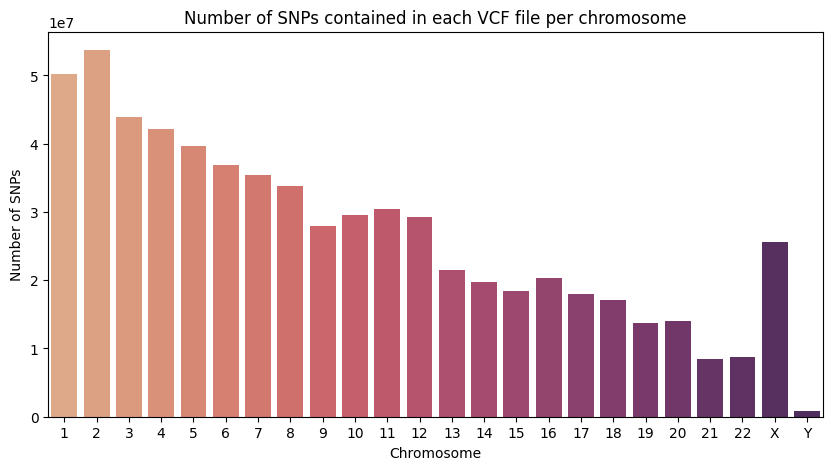

In [3]:
# Plot number of SNPS per chromosome
# Set the figure size
plt.figure(figsize=(10, 5))
sns.barplot(x='CHR', y='SNPs', data=variant_types, palette='flare')
plt.xlabel('Chromosome')
plt.ylabel('Number of SNPs')
plt.title('Number of SNPs contained in each VCF file per chromosome')
plt.show()

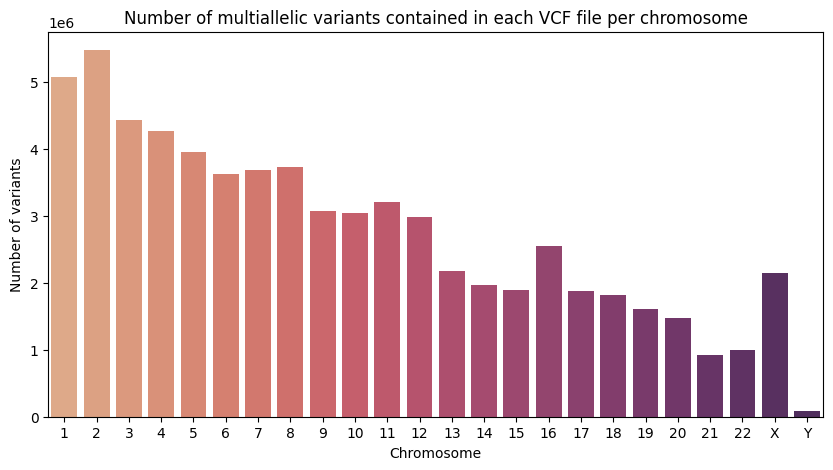

In [4]:
# Plot the number of multiallelic variants per chromosome
# Set the figure size
plt.figure(figsize=(10, 5))
sns.barplot(x='CHR', y='multiallelic', data=variant_types, palette='flare')
plt.xlabel('Chromosome')
plt.ylabel('Number of variants')
plt.title('Number of multiallelic variants contained in each VCF file per chromosome')
plt.show()

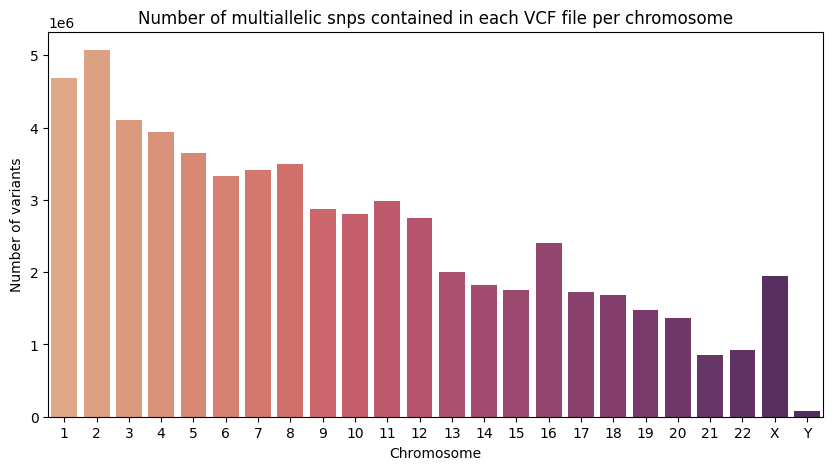

In [6]:
# Plot the number of multiallelic SNPs per chromosome
# Set the figure size
plt.figure(figsize=(10, 5))
sns.barplot(x='CHR', y='multiallelic_snps', data=variant_types, palette='flare')
plt.xlabel('Chromosome')
plt.ylabel('Number of variants')
plt.title('Number of multiallelic snps contained in each VCF file per chromosome')
plt.show()

The distributions remain similar. It makes sense since it's logic that for longer chromosomes there's more space for mutations for occur.

In [7]:
# Load chromsome 1 data
chromosome1_variants = pd.read_table('/mnt/sda1/Databases/Ensembl/Variation/110/vcf_stats/chr1_data.tsv', delimiter= '\t')
chromosome1_variants.head()

,#[1]CHROM,[2]POS,[3]REF,[4]ALT,[5]TSA,[6]ID
0,1,10001,T,A,SNV,rs1570391677
1,1,10002,A,C,SNV,rs1570391692
2,1,10003,A,C,SNV,rs1570391694
3,1,10008,A,G,SNV,rs1570391698
4,1,10009,A,G,SNV,rs1570391702


In [8]:
# Extract the value counts to check if there are repeated positions of variants in the chromosom
counts = chromosome1_variants['[2]POS'].value_counts()
counts

[2]POS   
98663252     28
28753356     26
23017176     26
47990770     25
243693242    25
             ..
77306910      1
77306916      1
77306917      1
77306919      1
248946420     1
Name: count, Length: 53355185, dtype: int64

In [30]:
counts.index.sort_values()
counts

[2]POS
98663252     28
28753356     26
23017176     26
47990770     25
243693242    25
             ..
77306910      1
77306916      1
77306917      1
77306919      1
248946420     1
Name: count, Length: 53355185, dtype: int64

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x=counts.index, y=counts.values, palette='flare')
plt.xlabel('Positions')
plt.ylabel('Number of variants')
plt.title('Number of multiallelic snps contained in each VCF file per chromosome')
plt.show()

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>